<small><i>(c) October 2016 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol).</i></small>

# pill 7 - Stochastic Subgradient Methods

Outline:

+ A quick introduction to Stochastic subgradient methods
+ Mini batch approximation
+ Speeding up subgradient methods


# Stochastic subgradient methods

A vector $g \in {\bf R}^n$ is a *subgradient* of $f:{\bf R}^n\rightarrow{\bf R}$ at $x\in {\bf \text{dom}}\; f$ if for all $z\in {\bf \text{dom}}\; f$,

$$
f(z)\geq f(x) + g^T (z-x)
$$

The hyperplane with normal $(g,-1)$ supports ${\bf \text{epi}}\; f$ at $(x,f(x))$. Thus if $f$ is convex and differentiable, then its gradient at $x$ is a subgradient. Note that the subgradient can exist even when $f$ is not differentiable at $x$, and more of one subgradient may exist. A function $f$ is called *subdifferentiable* at $x$ if there exists at least one subgradient at $x$. The set of subgradietns of $f$ at the point $x$ is called the *subdifferential* of $f$ at $x$, and is denoted as $\partial f(x)$. A function $f$ is called subdifferentiable if it is subdifferentiable at all $x\in {\bf \text{dom}}\; f$. If $f$ is convex and differentiable at $x$, then $\partial f(x) = \{\nabla f(x)\}$, i.e. the gradient is the only subgradient. 

## Minimum of a non-differentiable function

A point $x^*$ is a minimizer of a convex function $f$ if and only if $f$ is subdifferentiable at $x^*$ and 
$$0 \in \partial f(x^*)$$
i.e. $0$ is a subgradient of $f$ at $x^*$. This follows from the definition of subgradient and the fact that $f(x)\geq f(x^*)$. If $f$ is differentiable at $x^*$, the equation is reduced to $\nabla f(x^*) = 0$.

## Using subgradients for solving convex optimization problems

In this section, the extension of the subgradient method is explained to solve an inequality constrained problem

$$
\begin{align}
\text{minimize } & \quad f_0(x)\\
\text{subject to } & \quad f_i(x)\leq 0, \quad  \; i = 1,\dots, m,
\end{align}
$$

where $f_i$ are convex. The algorithm takes the same form:

$$x^{(k+1)} = x^{(k)} - \alpha_k g^{(k)},$$

where $\alpha_k>0$ is a step size, and $g^{(k)}$ is a subgradient of the objective or one of the constraint functions at $x^{(k)}$. More specifically, we take

$$
g^{(k)}\in \left \{ \begin{align}
\partial f_0(x^{(k)}) & \quad f_i(x^{(k)})\leq 0, \; i= 1,\dots, m,\\
\partial f_j(x^{(k)}) & \quad f_j(x^{(k)}) > 0.\\
\end{align}   \right.
$$

i.e. if  $x^{(k)}$ is feasible ($f_i(x^{(k)})\leq 0, \; i= 1,\dots, m$), we use an objective subgradient. Otherwise, if the current point is infeasible, we choose any violated constraint, and use a subgradient of the associated constraint function. Note that we may choose any of the violated constraints. Observe also that the iterates are often infeasible (this does not happen in the projected subgradient method). We can alternatively use a projection of the solution into the feasible set, i.e. we may project such that the violated constrained is no longer violated. As in the unconstrained case, we may keep track of the best feasible point found so far,
$$f_{\mbox{best}}^{(k)} = \min \{f_0(x^{(i)})|\; x^{(i)} \mbox{feasible}, i = 1,\dots,k\}.$$
If there are no feasible points $f_{\mbox{best}}^{(k)} = \infty$.

## Stochastic subgradient methods 

Supose we have a noisy problem and we can not evaluate exactly the value of the subgradient. For example, if we are dealing with a random variable the instantaneous gradient is not reliable. There may be different sources of noise, e.g. noise due to a finite sampling, measurement noise, uncertainty in data collection, etc. 

Let $f: {\bf R}^n \rightarrow {\bf R}$ be a convex function. We say that $\tilde{g} \in {\bf R}^n$ is a *noisy (unbiased) subgradient* of $f$ at $x \in {\bf dom}\; f$ if $g = {\bf E} \,\tilde{g} \in \partial f(x)$, i.e. we have

$$f(z) \geq f(x) + ({\bf E}\, \tilde{g})^T(z-x).$$

This is, the expected value is a subgradient. Thus we can consider that $\tilde{g} = g + v$, where $g\in \partial f(x)$ is a subgradient and $v$ is a zero mean random "noise". If $x$ is a random variable, then we say that $\tilde{g}$ is a noisy subgradient if

$$\forall z \quad f(z)\geq f(x) + {\bf E}\, (\tilde{g}|x)^T (z-x),$$

holds almost surely. In other words, ${\bf E}\, (\tilde{g}|x) \in \partial f(x)$.

## The stochastic gradient method

Stochastic gradient methods are essentially the subgradient method using noisy subgradients. Consider the minimization of a convex function $f$,  the stochastic subgradient method uses the standard update rule,

$$x^{(k+1)} = x^{(k)} -\alpha_k \tilde{g}^{(k)},$$

where $x^{(k)}$ is the $k$th iterate, $\alpha_k > 0$ is the $k$th step size, and $\tilde{g}^{(k)}$ is a noisy subgradient of $f$ at $x^{(k)}$,

$${\bf E}\,(\tilde{g}^{(k)}| x^{(k)}) = g^{(k)} \in \partial f (x^{(k)})$$

We omit the convergence proof, but with square summable but not summable step size, e.g. $\alpha_k = a / (b + k)$, it can be proved convergence in expectation, i.e. ${\bf E}\, f_{best}^{(k)}\underset{k\rightarrow \infty}{\rightarrow} f^*$, and convergence in probability, i.e. $\underset{k\rightarrow \infty}{\lim} {\bf Prob} (f_{best}^{(k)}\geq f^* + \epsilon) = 0.$

## The algorithm

We can use two possible algorithms, either a full stochastic subgradient iteration or a combination of subgradient and projection methods. Let us consider the hybrid version for the sake of simplicity:

```
while no_ending (iterations k):
  1. Compute the subgradient of the loss function, g_tilde.
  2. Take the step 
      x = x - 1/k * g_tilde
  3. Project the into the feasible set 
      x = P(x)
```


## Solving problems using Stochastic Subgradient Methods (SSM)

Let us solve our well known least squares problem

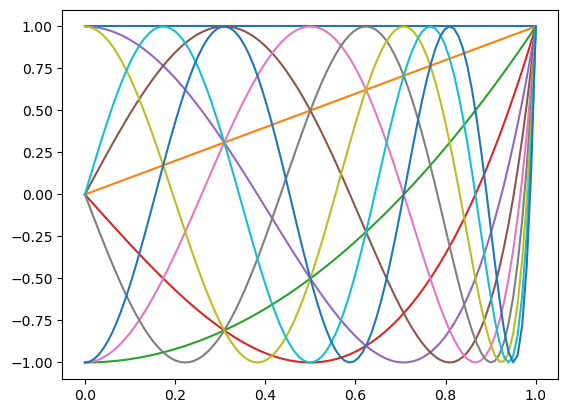

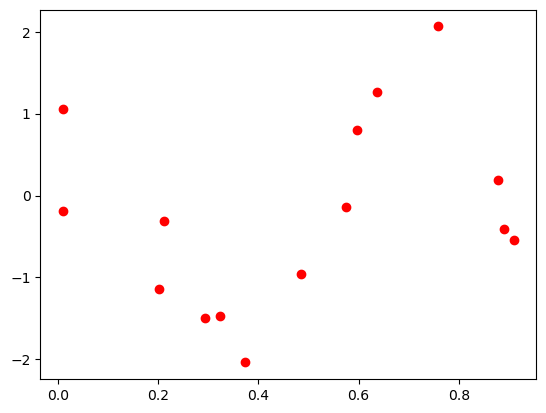

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def polyval(coefs, x):
    res = coefs[0]*np.ones((1,x.shape[0]))
    for i in range(1,len(coefs)):
        res = res + coefs[i]*np.power(x,i)
    return res
        

def chebys (coefs, x):
    pol = {}
    pol[0] = [1][::-1]
    pol[1] = [1, 0][::-1]
    pol[2] = [2, 0, -1][::-1]
    pol[3] = [4, 0, -3, 0][::-1]
    pol[4] = [8, 0, -8, 0, 1][::-1]
    pol[5] = [16, 0, -20, 0, 5, 0][::-1]
    pol[6] = [32, 0, -48, 0, 18, 0, -1][::-1]
    pol[7] = [64, 0, -112, 0, 56, 0, -7, 0][::-1]
    pol[8] = [128, 0, -256, 0, 160, 0, -32, 0, 1][::-1]
    pol[9] = [256, 0, -576, 0, 432, 0, -120, 0, 9, 0][::-1]
    pol[10] = [512, 0, -1280, 0, 1120, 0, -400, 0, 50, 0, -1][::-1]
    pol[11] = [1024, 0, -2816, 0, 2816, 0, -1232, 0, 220, 0, -11, 0][::-1]

    res = np.zeros((1,x.shape[0]))

    for i in range(len(coefs)):
        res= res + coefs[i]*polyval(pol[i],x)
    return res

        
x = np.linspace(0,1,100)

%matplotlib inline
import matplotlib.pyplot as plt

for i in range(11):
    co = np.zeros((11,))
    co[i]=1.
    plt.plot(x,chebys(co,x).ravel())
    
#Create a polynomial with noise
np.random.seed(42)
coefs = np.random.random(11)

x = np.linspace(0,1,100)

vals=chebys(coefs,x).ravel()
#plt.plot(x,vals)

N=15
idx = np.random.randint(0,100,N)
data = vals[idx]+0.5*np.random.normal(size=len(idx))
plt.figure()
plt.plot(x[idx],data,'ro')

x_train = x[idx][:,np.newaxis]
y_train = data[:,np.newaxis]

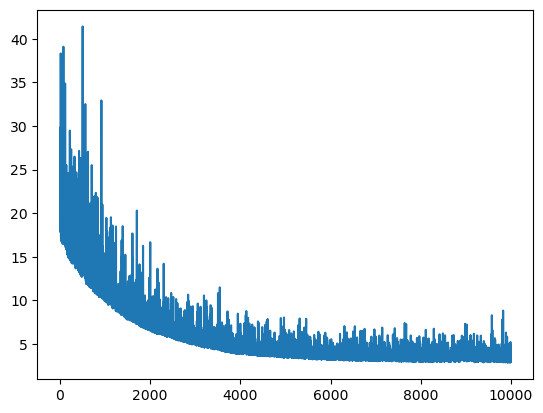

In [2]:
X = np.c_[np.ones((15,1)),x_train,x_train**2,x_train**3,x_train**4,x_train**5,x_train**6,x_train**7,x_train**8,x_train**9,x_train**10].T

import numpy as np

#initialize weights
w = np.zeros((11,1))
conv = []
n_iters = 10000
step = 0.1


for k in range(1,n_iters):
    #get a noisy gradient by just taking one data point at random and get the instantaneous gradient
    i = np.random.randint(0,X.shape[1])
    x_sample = X[:,i][:,np.newaxis]
    y_sample = y_train[i,:]
    g_tilde = -2*x_sample*(y_sample-np.dot(x_sample.T,w))

    w = w - step * g_tilde
    
    J=np.sum((np.dot(X.T,w)-y_train)*(np.dot(X.T,w)-y_train))
    
    conv.append(J)
    
plt.plot(conv)

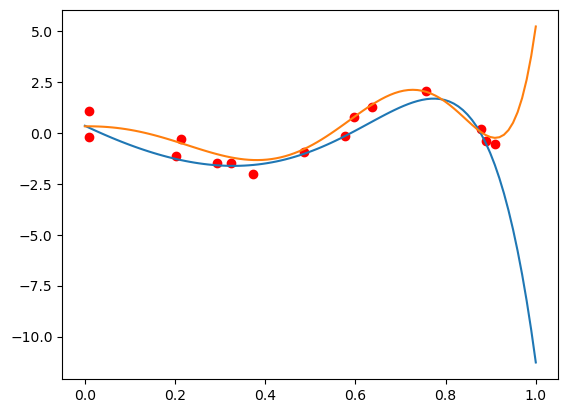

In [3]:
x_draw = np.linspace(0,1,100)

x_extended = np.c_[np.ones((100,1)),x_draw,x_draw**2,x_draw**3,x_draw**4,x_draw**5,x_draw**6,x_draw**7,x_draw**8,x_draw**9,x_draw**10].T

y_hat = np.dot(x_extended.T,w)

plt.plot(x_train,y_train,'ro')
plt.plot(x_draw,y_hat)
plt.plot(x,vals)

<div class = "alert alert-success" style = "border-radius:10px">**EXERCISE** Use a **pocket** strategy and keep the best weight so far. Plot the new convergence plot.</div>

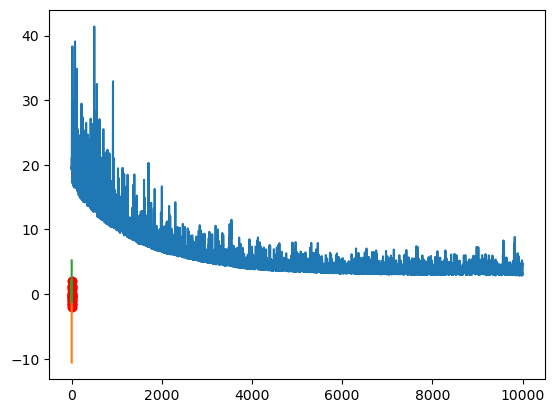

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def polyval(coefs, x):
    res = coefs[0] * np.ones((1, x.shape[0]))
    for i in range(1, len(coefs)):
        res = res + coefs[i] * np.power(x, i)
    return res

def chebys(coefs, x):
    pol = {}
    pol[0] = [1][::-1]
    pol[1] = [1, 0][::-1]
    pol[2] = [2, 0, -1][::-1]
    pol[3] = [4, 0, -3, 0][::-1]
    pol[4] = [8, 0, -8, 0, 1][::-1]
    pol[5] = [16, 0, -20, 0, 5, 0][::-1]
    pol[6] = [32, 0, -48, 0, 18, 0, -1][::-1]
    pol[7] = [64, 0, -112, 0, 56, 0, -7, 0][::-1]
    pol[8] = [128, 0, -256, 0, 160, 0, -32, 0, 1][::-1]
    pol[9] = [256, 0, -576, 0, 432, 0, -120, 0, 9, 0][::-1]
    pol[10] = [512, 0, -1280, 0, 1120, 0, -400, 0, 50, 0, -1][::-1]
    pol[11] = [1024, 0, -2816, 0, 2816, 0, -1232, 0, 220, 0, -11, 0][::-1]

    res = np.zeros((1, x.shape[0]))

    for i in range(len(coefs)):
        res = res + coefs[i] * polyval(pol[i], x)
    return res

# Generate data with noise
np.random.seed(42)
coefs = np.random.random(11)
x = np.linspace(0, 1, 100)
vals = chebys(coefs, x).ravel()

# Plot the noisy data
N = 15
idx = np.random.randint(0, 100, N)
data = vals[idx] + 0.5 * np.random.normal(size=len(idx))
plt.figure()
plt.plot(x[idx], data, 'ro')

x_train = x[idx][:, np.newaxis]
y_train = data[:, np.newaxis]
X = np.c_[np.ones((15, 1)), x_train, x_train**2, x_train**3, x_train**4, x_train**5, x_train**6, x_train**7, x_train**8, x_train**9, x_train**10].T

# Initialize weights and the pocket best weights
w = np.zeros((11, 1))
wopt = w.copy()
conv = []
pocket_error = float("inf")
n_iters = 10000
step = 0.1

for k in range(1, n_iters):
    i = np.random.randint(0, X.shape[1])
    x_sample = X[:, i][:, np.newaxis]
    y_sample = y_train[i, :]
    g_tilde = -2 * x_sample * (y_sample - np.dot(x_sample.T, w))

    w = w - step * g_tilde

    J = np.sum((np.dot(X.T, w) - y_train) * (np.dot(X.T, w) - y_train))
    conv.append(J)

    # Check if the current weights are better than the pocket best weights
    if J < pocket_error:
        best_w = w.copy()
        pocket_error = J

plt.plot(conv)

x_draw = np.linspace(0, 1, 100)
x_extended = np.c_[np.ones((100, 1)), x_draw, x_draw**2, x_draw**3, x_draw**4, x_draw**5, x_draw**6, x_draw**7, x_draw**8, x_draw**9, x_draw**10].T
y_hat = np.dot(x_extended.T, best_w)

plt.plot(x_train, y_train, 'ro')
plt.plot(x_draw, y_hat)
plt.plot(x, vals)

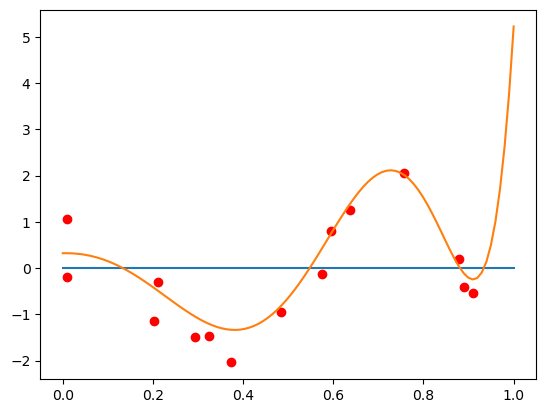

In [5]:
x_draw = np.linspace(0,1,100)

x_extended = np.c_[np.ones((100,1)),x_draw,x_draw**2,x_draw**3,x_draw**4,x_draw**5,x_draw**6,x_draw**7,x_draw**8,x_draw**9,x_draw**10].T

y_hat = np.dot(x_extended.T,wopt)

plt.plot(x_train,y_train,'ro')
plt.plot(x_draw,y_hat)
plt.plot(x,vals)

# Checking the path

For the sake of simplicity we consider a 2D subproblem of the former problem and visualize the weight pass.

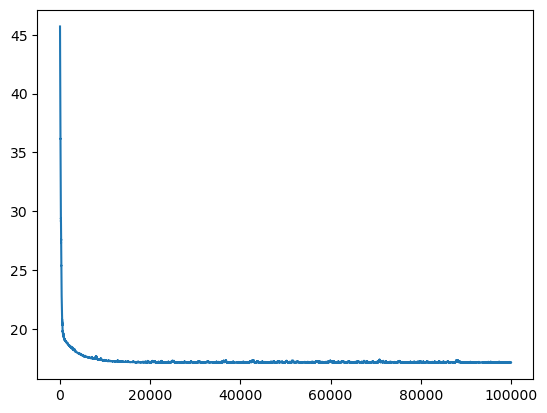

In [6]:
import numpy as np

X = np.c_[np.ones((15,1)),x_train].T


#initialize weights
w = -np.ones((2,1))
conv = []
wpath = []
wpath.append(w)
n_iters = 100000
Jopt = 9e16
wopt = w

step = 0.001
for k in range(1,n_iters):
    #get a noisy gradient by just taking one data point at random and get the instantaneous gradient
    i = np.random.randint(0,X.shape[1])
    x_sample = X[:,i][:,np.newaxis]
    y_sample = y_train[i,:]
    g_tilde = -2*x_sample*(y_sample-np.dot(x_sample.T,w))
       
    w = w - step * g_tilde
    
    #Keep the best weight up to that point 
    J=np.sum((np.dot(X.T,w)-y_train)*(np.dot(X.T,w)-y_train))
    wpath.append(w)
    conv.append(J)
    #Project if needed
    ## Add your projection code here
    
plt.plot(conv)



1.1622378171972019 9.359145889790954
(64,)


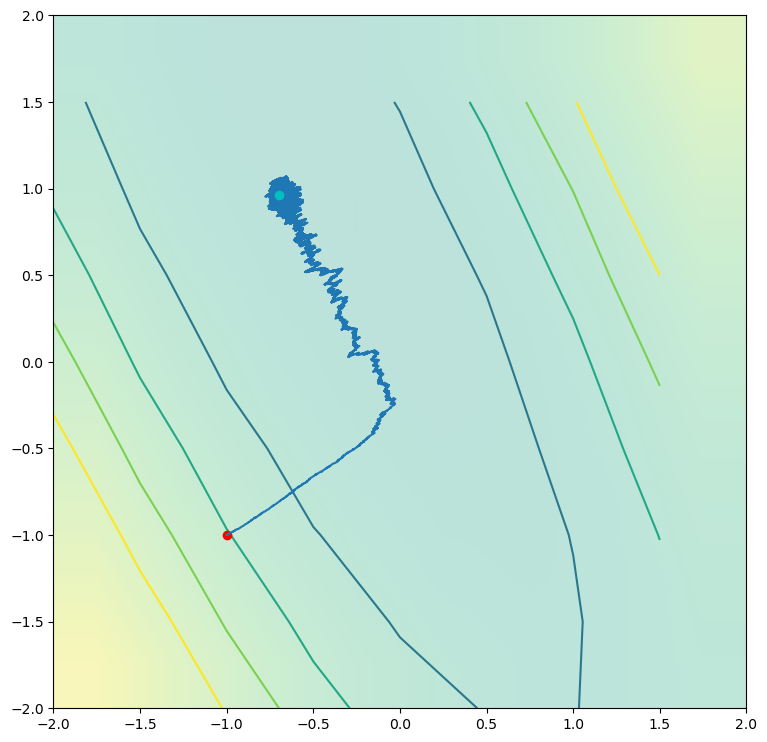

In [7]:
#order = np.Inf
order = 10
delta = 0.5
xx = np.arange(-2.0, 2.0, delta)
yy = np.arange(-2.0, 2.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
Z = np.sum((np.dot(X.T,data.T)-y_train)*(np.dot(X.T,data.T)-y_train),axis = 0)/15.
print (np.min(Z),np.max(Z))
#print data.shape
#Z = np.linalg.norm(data,ord = order,axis = 1)
print (Z.shape)
Z.shape=sz
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-2,2,-2,2),alpha=0.3, vmin=-10, vmax=10)
plt.contour(XX,YY,Z,[0,1,2,3,4,5])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.plot(-1,-1,'ro')
plt.plot(np.array(wpath)[:,0],np.array(wpath)[:,1])
plt.plot(np.array(wpath)[-1,0],np.array(wpath)[-1,1],'co')


1.1434731439894095 38.57920296402233
(25600,)


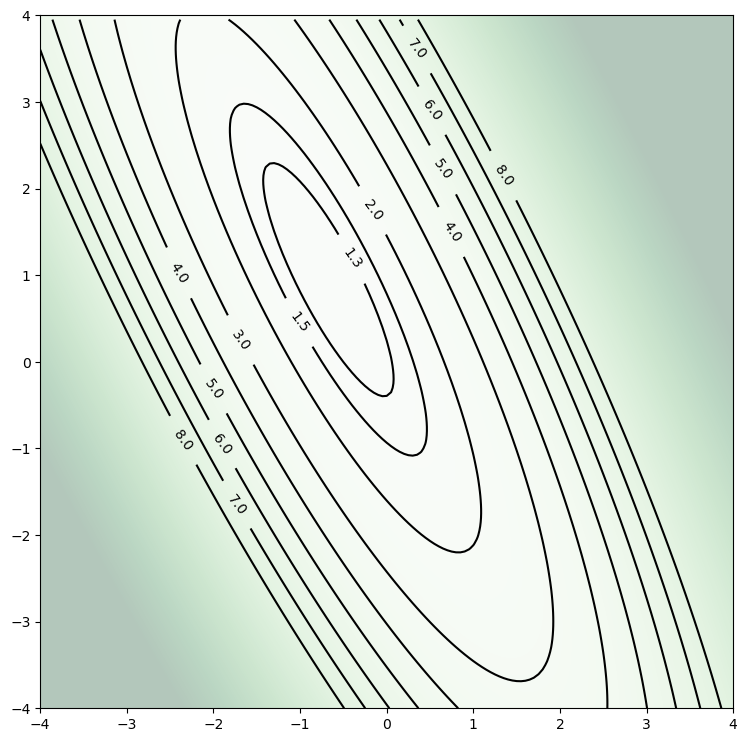

In [8]:
#order = np.Inf
order = 2
delta = 0.05
xx = np.arange(-4.0, 4.0, delta)
yy = np.arange(-4.0, 4.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
Z = np.sum((np.dot(X.T,data.T)-y_train)*(np.dot(X.T,data.T)-y_train),axis = 0)/15.
print (np.min(Z),np.max(Z))
#print data.shape
#Z = np.linalg.norm(data,ord = order,axis = 1)
print (Z.shape)
Z.shape=sz
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-4,4,-4,4),alpha=0.3, vmin=-20, vmax=20, cmap = "PRGn")
CS = plt.contour(XX,YY,Z,[1.3,1.5,2,3,4,5,6,7,8], colors = 'k')
plt.clabel(CS, inline=1, fontsize=10)

fig = plt.gcf()
fig.set_size_inches(9,9)

fig.savefig('contours.jpg',dpi=300,bbox_inches='tight')

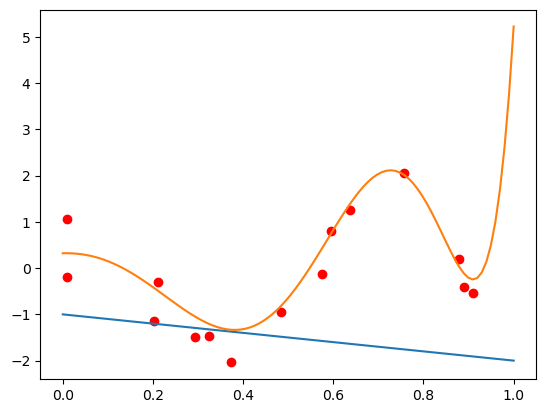

In [9]:
%matplotlib inline

x_draw = np.linspace(0,1,100)

x_extended = np.c_[np.ones((100,1)),x_draw].T

y_hat = np.dot(x_extended.T,wopt)

plt.plot(x_train,y_train,'ro')
plt.plot(x_draw,y_hat)
plt.plot(x,vals)

<div class = "alert alert-success" style = "border-radius:10px">**EXERCISE** Plot the path when you use the **pocket** strategy.</div>

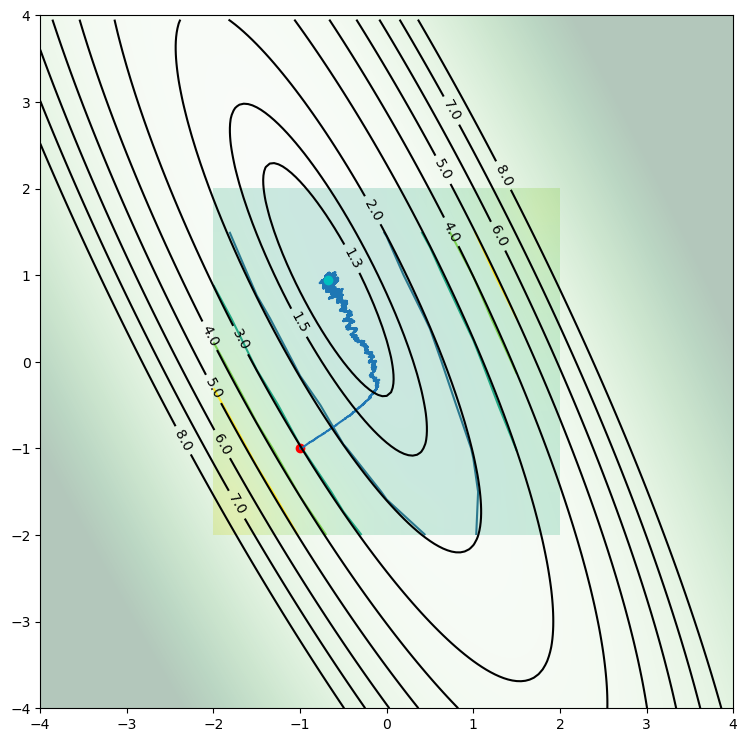

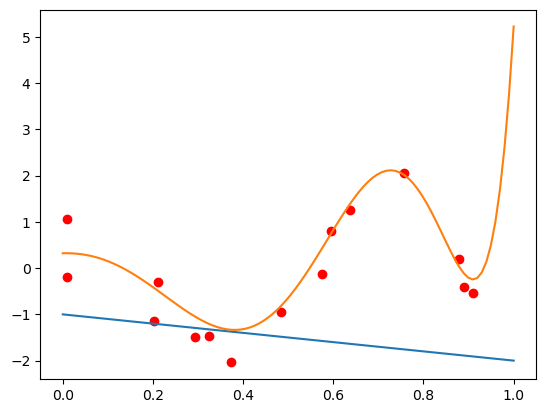

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Previous code (including optimization and plotting)

# Initialize weights for contour plot
w = -np.ones((2, 1))
wpath = []
wpath.append(w)
n_iters = 100000
wopt = w
step = 0.001
for k in range(1, n_iters):
    # Get a noisy gradient by taking one data point at random and get the instantaneous gradient
    i = np.random.randint(0, X.shape[1])
    x_sample = X[:, i][:, np.newaxis]
    y_sample = y_train[i, :]
    g_tilde = -2 * x_sample * (y_sample - np.dot(x_sample.T, w))
    w = w - step * g_tilde
    
    # Keep the best weight up to that point
    J = np.sum((np.dot(X.T, w) - y_train) * (np.dot(X.T, w) - y_train))
    wpath.append(w)

# Contour plot
order = 10
delta = 0.5
xx = np.arange(-2.0, 2.0, delta)
yy = np.arange(-2.0, 2.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz = XX.shape
data = np.concatenate([Xf[:, np.newaxis], Yf[:, np.newaxis]], axis=1)
Z = np.sum((np.dot(X.T, data.T) - y_train) * (np.dot(X.T, data.T) - y_train), axis=0) / 15.

Z.shape = sz
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-2, 2, -2, 2), alpha=0.3, vmin=-10, vmax=10)
plt.contour(XX, YY, Z, [0, 1, 2, 3, 4, 5])
fig = plt.gcf()
fig.set_size_inches(9, 9)
plt.plot(-1, -1, 'ro')
plt.plot(np.array(wpath)[:, 0], np.array(wpath)[:, 1])
plt.plot(np.array(wpath)[-1, 0], np.array(wpath)[-1, 1], 'co')

# More contour plotting
order = 2
delta = 0.05
xx = np.arange(-4.0, 4.0, delta)
yy = np.arange(-4.0, 4.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz = XX.shape
data = np.concatenate([Xf[:, np.newaxis], Yf[:, np.newaxis]], axis=1)
Z = np.sum((np.dot(X.T, data.T) - y_train) * (np.dot(X.T, data.T) - y_train), axis=0) / 15.

Z.shape = sz
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-4, 4, -4, 4), alpha=0.3, vmin=-20, vmax=20, cmap="PRGn")
CS = plt.contour(XX, YY, Z, [1.3, 1.5, 2, 3, 4, 5, 6, 7, 8], colors='k')
plt.clabel(CS, inline=1, fontsize=10)

fig = plt.gcf()
fig.set_size_inches(9, 9)
fig.savefig('contours.jpg', dpi=300, bbox_inches='tight')

# Finally, plot the result from your previous code
x_draw = np.linspace(0, 1, 100)
x_extended = np.c_[np.ones((100, 1)), x_draw].T
y_hat = np.dot(x_extended.T, wopt)

plt.figure()
plt.plot(x_train, y_train, 'ro')
plt.plot(x_draw, y_hat)
plt.plot(x, vals)

plt.show()

1.1622378171972019 9.359145889790954
(64,)


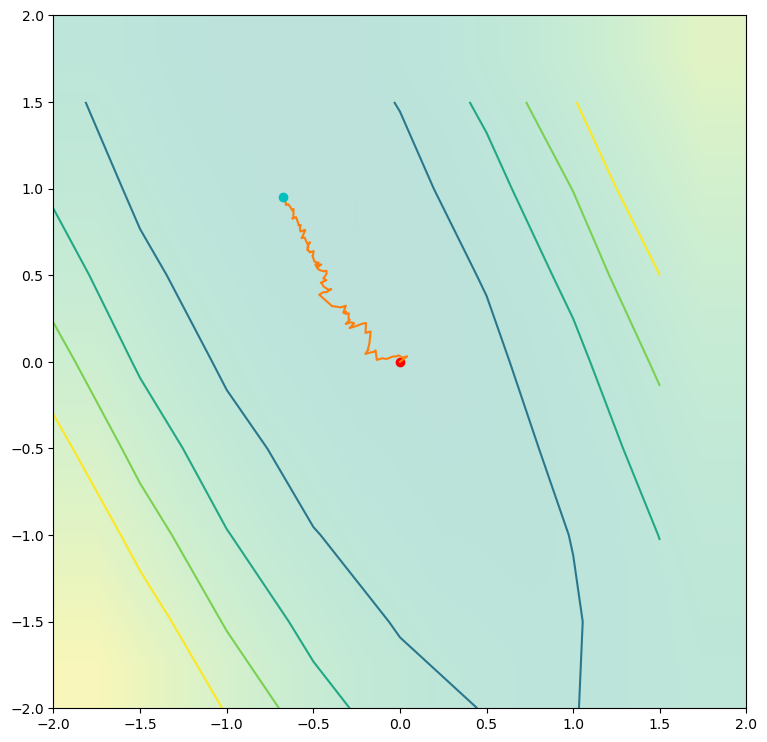

In [11]:
X = np.c_[np.ones((15,1)),x_train].T

import numpy as np

#initialize weights
w = np.zeros((2,1))
conv = []
wpath = []
wpath.append(w)
n_iters = 100000
Jopt = 9e16
wopt = w

step = 0.01
for k in range(1,n_iters):
    #get a noisy gradient by just taking one data point at random and get the instantaneous gradient
    i = np.random.randint(0,X.shape[1])
    x_sample = X[:,i][:,np.newaxis]
    y_sample = y_train[i,:]
    g_tilde = -2*x_sample*(y_sample-np.dot(x_sample.T,w))
       
    w = w - step * g_tilde
    
    #Keep the best weight up to that point 
    J=np.sum((np.dot(X.T,w)-y_train)*(np.dot(X.T,w)-y_train))
    if J<Jopt:
        Jopt = J
        wopt = w
    
    wpath.append(wopt)
    #Project if needed
    ## Add your projection code here
    
plt.plot(conv)

#order = np.Inf
order = 2
delta = 0.5
xx = np.arange(-2.0, 2.0, delta)
yy = np.arange(-2.0, 2.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
Z = np.sum((np.dot(X.T,data.T)-y_train)*(np.dot(X.T,data.T)-y_train),axis = 0)/15.
print (np.min(Z),np.max(Z))
#print data.shape
#Z = np.linalg.norm(data,ord = order,axis = 1)
print (Z.shape)
Z.shape=sz
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-2,2,-2,2),alpha=0.3, vmin=-10, vmax=10)
plt.contour(XX,YY,Z,[0,1,2,3,4,5])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.plot(0,0,'ro')
plt.plot(np.array(wpath)[:,0],np.array(wpath)[:,1])
plt.plot(np.array(wpath)[-1,0],np.array(wpath)[-1,1],'co')

# Mini batch

The noisy gradient can be as noisy as a single point but we can approximate the true function using more data. This is the mini-batch method. In this case we use the average gradient of the subset of the data. Observe that this is simply a sub sampling of the objective function.

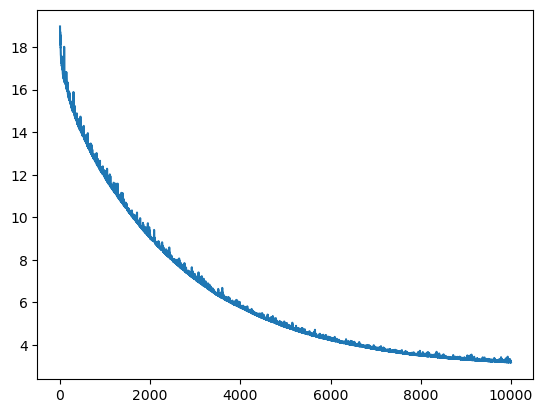

In [12]:
X = np.c_[np.ones((15,1)),x_train,x_train**2,x_train**3,x_train**4,x_train**5,x_train**6,x_train**7,x_train**8,x_train**9,x_train**10].T

import numpy as np

#initialize weights
w = np.zeros((11,1))
conv = []
wpath = []
wpath.append(w)
n_iters = 10000
Jopt = 9e16
wopt = w
mbatch_size=12
step = 0.005
for k in range(1,n_iters):
    #get a noisy gradient by just taking one data point at random and get the instantaneous gradient
    i = np.random.randint(0,X.shape[1],size=mbatch_size)
    x_sample = X[:,i]
    y_sample = y_train[i,:]
    g_tilde = -2*np.dot(x_sample,(y_sample-np.dot(x_sample.T,w)))

    w = w - step * g_tilde
    
    #Keep the best weight up to that point 
    J=np.sum((np.dot(X.T,w)-y_train)*(np.dot(X.T,w)-y_train))
    if J<Jopt:
        wopt = w
        Jopt = J
    conv.append(J)
    wpath.append(w)
    #Project if needed
    ## Add your projection code here
    
plt.plot(conv)

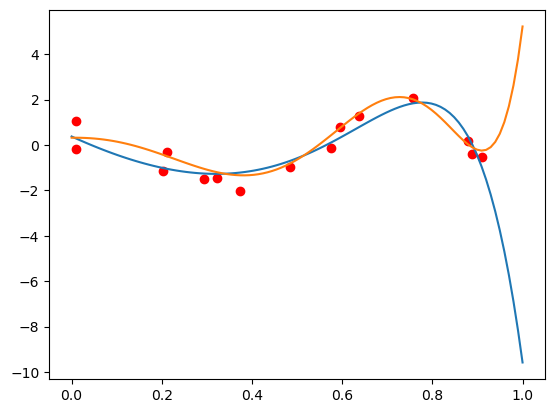

In [13]:
x_draw = np.linspace(0,1,100)

x_extended = np.c_[np.ones((100,1)),x_draw,x_draw**2,x_draw**3,x_draw**4,x_draw**5,x_draw**6,x_draw**7,x_draw**8,x_draw**9,x_draw**10].T

y_hat = np.dot(x_extended.T,wopt)

plt.plot(x_train,y_train,'ro')
plt.plot(x_draw,y_hat)
plt.plot(x,vals)

Observe now the path.

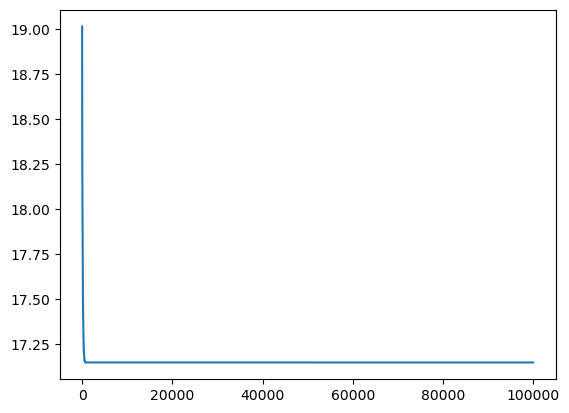

In [14]:
X = np.c_[np.ones((15,1)),x_train].T

import numpy as np

#initialize weights
w = np.zeros((2,1))
conv = []
wpath = []
wpath.append(w)
n_iters = 100000
Jopt = 9e16
wopt = w
mbatch_size=30
step = 0.001
for k in range(1,n_iters):
    #get a noisy gradient by just taking one data point at random and get the instantaneous gradient
   
    i = np.random.randint(0,X.shape[1],size=mbatch_size)
    x_sample = X[:,i]
    y_sample = y_train[i,:]
    g_tilde = -2*np.dot(x_sample,(y_sample-np.dot(x_sample.T,w)))

    w = w - step * g_tilde
    
    #Keep the best weight up to that point 
    J=np.sum((np.dot(X.T,w)-y_train)*(np.dot(X.T,w)-y_train))
    if J<Jopt:
        wopt = w
        Jopt = J
    conv.append(Jopt)
    wpath.append(wopt)
    #Project if needed
    ## Add your projection code here
    
plt.plot(conv)



1.1622378171972019 9.359145889790954
(64,)


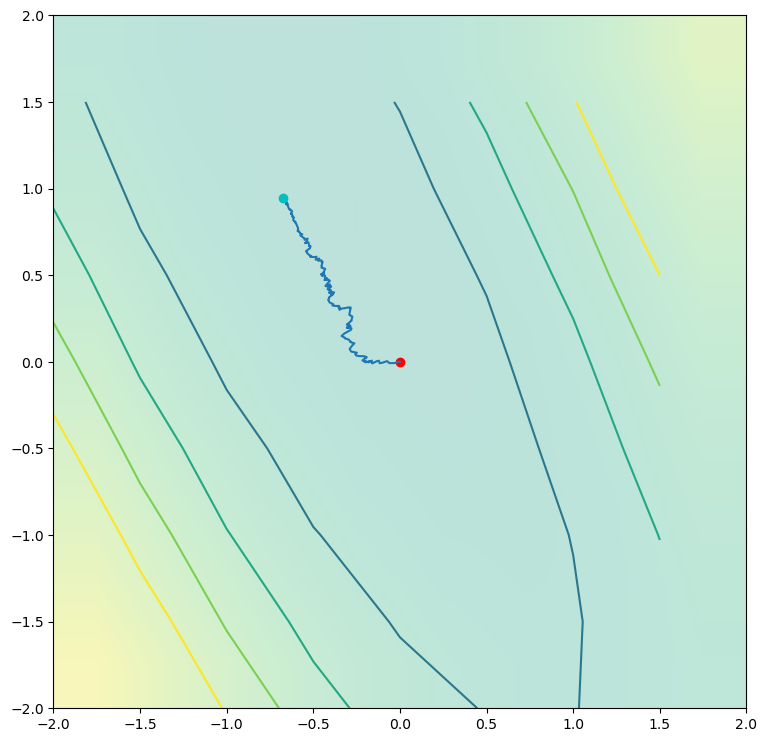

In [15]:
#order = np.Inf
order = 2
delta = 0.5
xx = np.arange(-2.0, 2.0, delta)
yy = np.arange(-2.0, 2.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
Z = np.sum((np.dot(X.T,data.T)-y_train)*(np.dot(X.T,data.T)-y_train),axis = 0)/15.
print (np.min(Z),np.max(Z))
#print data.shape
#Z = np.linalg.norm(data,ord = order,axis = 1)
print (Z.shape)
Z.shape=sz
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-2,2,-2,2),alpha=0.3, vmin=-10, vmax=10)
plt.contour(XX,YY,Z,[0,1,2,3,4,5])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.plot(0,0,'ro')
plt.plot(np.array(wpath)[:,0],np.array(wpath)[:,1])
plt.plot(np.array(wpath)[-1,0],np.array(wpath)[-1,1],'co')

<div class = "alert alert-success" style = "border-radius:10px">**EXERCISE** Change the `append` and use the optimal weights. Show the path of the optimal weights. How does it compare with the non-minibatch technique?</div>

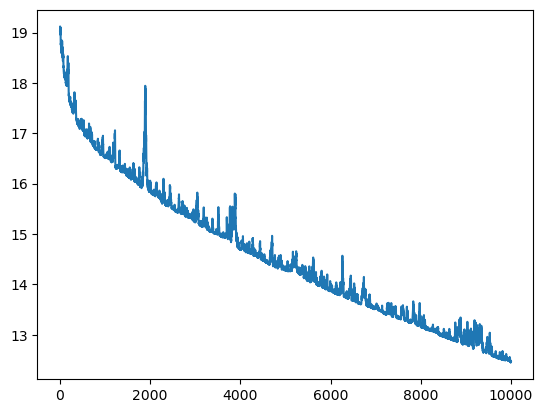

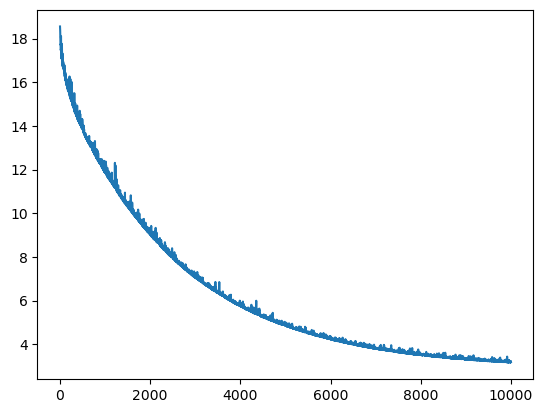

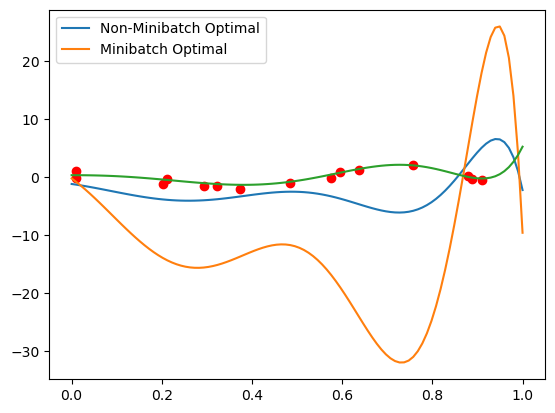

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Original data and model definition
X = np.c_[np.ones((15, 1)), x_train, x_train**2, x_train**3, x_train**4, x_train**5, x_train**6, x_train**7, x_train**8, x_train**9, x_train**10].T

# Non-Minibatch Gradient Descent
w = np.zeros((11, 1))
conv_non_minibatch = []
wpath_non_minibatch = []
wpath_non_minibatch.append(w)
n_iters = 10000
Jopt_non_minibatch = 9e16
wopt_non_minibatch = w
step = 0.005
for k in range(1, n_iters):
    i = np.random.randint(0, X.shape[1], size=1)
    x_sample = X[:, i]
    y_sample = y_train[i, :]
    g_tilde = -2 * np.dot(x_sample, (y_sample - np.dot(x_sample.T, w)))
    w = w - step * g_tilde
    
    J = np.sum((np.dot(X.T, w) - y_train) * (np.dot(X.T, w) - y_train))
    if J < Jopt_non_minibatch:
        wopt_non_minibatch = w
        Jopt_non_minibatch = J
    conv_non_minibatch.append(J)
    wpath_non_minibatch.append(wopt_non_minibatch)

# Minibatch Gradient Descent
w = np.zeros((11, 1))
conv_minibatch = []
wpath_minibatch = []
wpath_minibatch.append(w)
n_iters = 10000
Jopt_minibatch = 9e16
wopt_minibatch = w
mbatch_size = 12
step = 0.005
for k in range(1, n_iters):
    i = np.random.randint(0, X.shape[1], size=mbatch_size)
    x_sample = X[:, i]
    y_sample = y_train[i, :]
    g_tilde = -2 * np.dot(x_sample, (y_sample - np.dot(x_sample.T, w)))
    w = w - step * g_tilde
    
    J = np.sum((np.dot(X.T, w) - y_train) * (np.dot(X.T, w) - y_train))
    if J < Jopt_minibatch:
        wopt_minibatch = w
        Jopt_minibatch = J
    conv_minibatch.append(J)
    wpath_minibatch.append(wopt_minibatch)

# Plot Convergence for Non-Minibatch
plt.figure()
plt.plot(conv_non_minibatch)

# Plot Convergence for Minibatch
plt.figure()
plt.plot(conv_minibatch)

# Plot paths of the optimal weights for Non-Minibatch and Minibatch
plt.figure()
plt.plot(x_train, y_train, 'ro')
plt.plot(x_draw, chebys(wopt_non_minibatch, x_draw).ravel(), label='Non-Minibatch Optimal')
plt.plot(x_draw, chebys(wopt_minibatch, x_draw).ravel(), label='Minibatch Optimal')
plt.plot(x, vals)
plt.legend()
plt.show()

# Speeding up methods

These methods may suffer from a lack of speed convergence. There are several methods that allow to speed up the process.

## Momentum

In momentum we are trying to capture the notion of ‘inertia’ or that of ‘momentum’ (note that both are different concepts). The idea is that instead of moving in the direction of minus the gradient we will move in the direction of a combination of the previously accumulated directions combined with the new direction. This technique has a parameter $\gamma$ that is related to the decay or memory of the previous directions.

$$m^{(k+1)} = \gamma m^{(k)} - \alpha_k g^{(k)}$$

$$x^{(k+1)} = x^{(k)} + m^{(k+1)}$$ 

where $\gamma$ usually takes values around $0.9$.


<div class = "alert alert-success" style = "border-radius:10px">**EXERCISE** Fill the code gap with the momentum.</div>

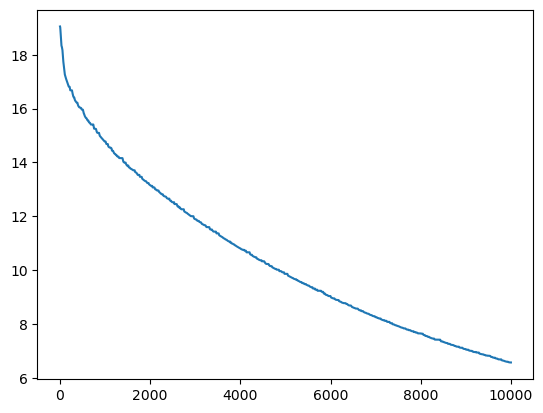

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you've defined X and other variables previously

# Initialize weights
w = np.zeros((11, 1))  # Change the shape of w to (11,1)
conv = []
wpath = []
wpath.append(w)
n_iters = 10000
Jopt = 9e16
wopt = w
mbatch_size = 10
step = 0.0001
momentum = 0.95
m = np.zeros((11, 1))  # Change the shape of m to (11,1)

for k in range(1, n_iters):
    # Get a noisy gradient by taking one data point at random and get the instantaneous gradient
    i = np.random.randint(0, X.shape[1], size=mbatch_size)
    x_sample = X[:, i]
    y_sample = y_train[i, :]
    g_tilde = -2 * np.dot(x_sample, (y_sample - np.dot(x_sample.T, w)))

    # Implement Momentum Update
    m = momentum * m - step * g_tilde
    w = w + m

    # Keep the best weight up to that point
    J = np.sum((np.dot(X.T, w) - y_train) * (np.dot(X.T, w) - y_train))
    if J < Jopt:
        wopt = w
        Jopt = J
    conv.append(Jopt)
    wpath.append(w)
    # Project if needed
    ## Add your projection code here

plt.plot(conv)

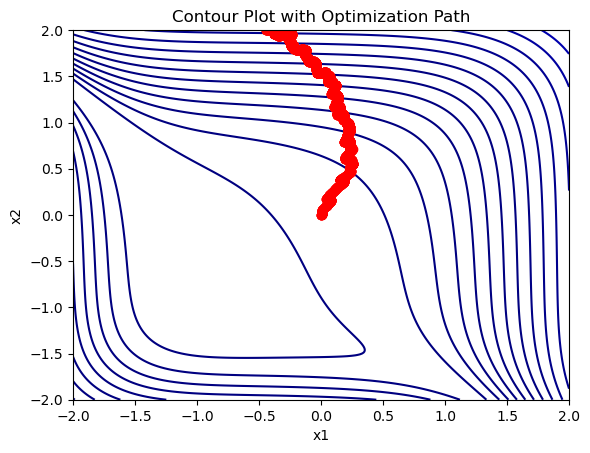

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition
def f(x):
    return np.sum((np.dot(X.T, x) - y_train) ** 2) / 15

# Assuming you've defined X and other variables previously

# Initialize weights
w = np.zeros((11, 1))  # Change the shape of w to (11,1)
conv = []
wpath = []
wpath.append(w)
n_iters = 10000
Jopt = 9e16
wopt = w
mbatch_size = 10
step = 0.0001
momentum = 0.95
m = np.zeros((11, 1))  # Change the shape of m to (11,1)

# Create a grid for contour plotting
x1_vals = np.linspace(-2, 2, 400)
x2_vals = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = np.zeros(X1.shape)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x_sample = np.array([[1], [X1[i, j]], [X2[i, j]], [X1[i, j]**2], [X2[i, j]**2], [X1[i, j]**3],
                             [X2[i, j]**3], [X1[i, j]**4], [X2[i, j]**4], [X1[i, j]**5], [X2[i, j]**5]])
        Z[i, j] = f(x_sample)

plt.figure()

for k in range(1, n_iters):
    # Get a noisy gradient by taking one data point at random and get the instantaneous gradient
    i = np.random.randint(0, X.shape[1], size=mbatch_size)
    x_sample = X[:, i]
    y_sample = y_train[i, :]
    g_tilde = -2 * np.dot(x_sample, (y_sample - np.dot(x_sample.T, w)))

    # Implement Momentum Update
    m = momentum * m - step * g_tilde
    w = w + m

    # Keep the best weight up to that point
    J = f(w)
    if J < Jopt:
        wopt = w
        Jopt = J
    conv.append(Jopt)
    wpath.append(w)

# Plot the contour plot with the optimization path
plt.contour(X1, X2, Z, levels=np.logspace(-1, 4, 30), cmap=plt.cm.jet)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Contour Plot with Optimization Path")
plt.plot(np.array(wpath)[:, 1], np.array(wpath)[:, 2], 'ro-')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

## Adagrad

A second family of methods tries to adapt the learning rate for each coordinate. This family of methods are of the form


$$x^{(k+1)} = x^{(k)} - \alpha_k D^{-1} g^{(k)}$$

where $D$ is a diagonal matrix. Observe that this independently adapts each coordinate. In particular in Adagrad, $D$ is defined as 

$$D = \sqrt{\sum_{i=1}^k \text{diag}(g^{(i)})}$$

The algorithm can be written as follows,

$$D^{(k+1)} = D^{(k)} + \text{diag}(g^{(k)})^2$$


$$x^{(k+1)} = x^{(k)} - \alpha_k (D+\epsilon I)^{-1/2}g^{(k)}$$ 

where $\epsilon I$ is added for stability purposes. Note that if we implement this we do not build the diagonal matrix but operate element to element with the gradients.

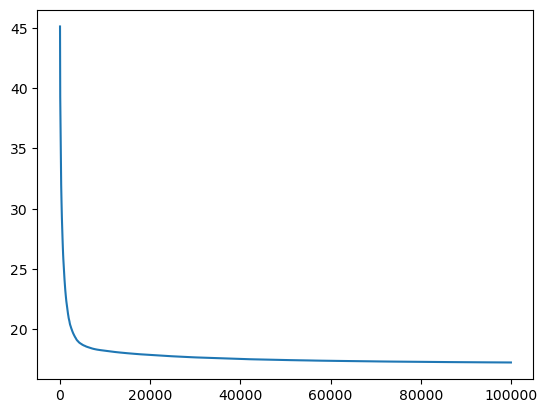

In [19]:
X = np.c_[np.ones((15,1)),x_train].T

import numpy as np

#initialize weights
#w = np.zeros((2,1))
w = -1.*np.ones((2,1))
conv = []
wpath = []
wpath.append(w)
n_iters = 100000
Jopt = 9e16
wopt = w
mbatch_size=10
step = 0.01
epsilon = 1e-16
D = np.zeros((2,1))
for k in range(1,n_iters):
    #get a noisy gradient by just taking one data point at random and get the instantaneous gradient
   
    i = np.random.randint(0,X.shape[1],size=mbatch_size)
    x_sample = X[:,i]
    y_sample = y_train[i,:]
    g_tilde = -2*np.dot(x_sample,(y_sample-np.dot(x_sample.T,w)))

    D = D + g_tilde*g_tilde
    
    w = w  - step * g_tilde / np.sqrt(D + epsilon)
    
    #Keep the best weight up to that point 
    J=np.sum((np.dot(X.T,w)-y_train)*(np.dot(X.T,w)-y_train))
    if J<Jopt:
        wopt = w
        Jopt = J
    conv.append(Jopt)
    wpath.append(w)
    #Project if needed
    ## Add your projection code here
    
plt.plot(conv)

1.1622378171972019 9.359145889790954
(64,)


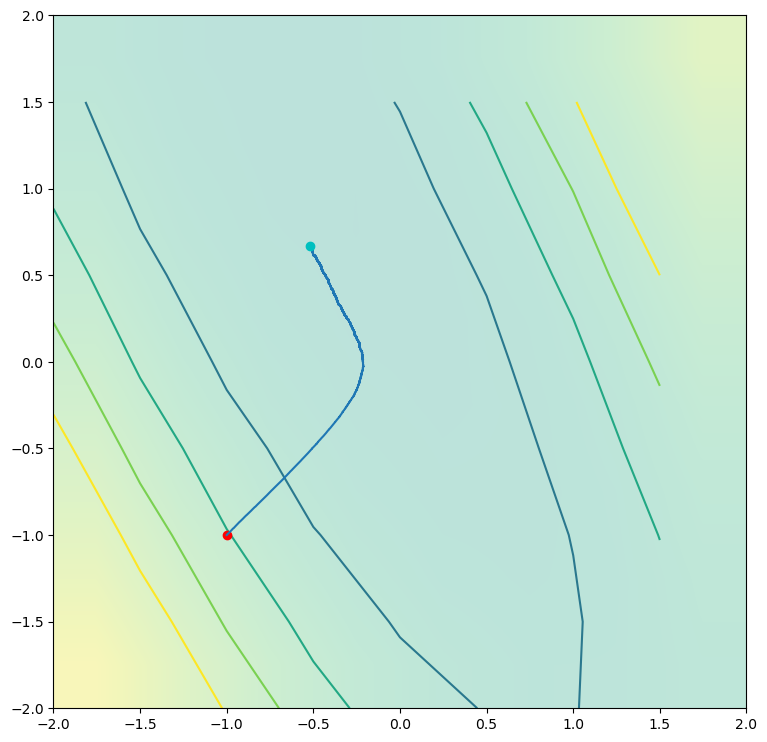

In [20]:
#order = np.Inf
order = 2
delta = 0.5
xx = np.arange(-2.0, 2.0, delta)
yy = np.arange(-2.0, 2.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
Z = np.sum((np.dot(X.T,data.T)-y_train)*(np.dot(X.T,data.T)-y_train),axis = 0)/15.
print (np.min(Z),np.max(Z))
#print data.shape
#Z = np.linalg.norm(data,ord = order,axis = 1)
print (Z.shape)
Z.shape=sz
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-2,2,-2,2),alpha=0.3, vmin=-10, vmax=10)
plt.contour(XX,YY,Z,[0,1,2,3,4,5])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.plot(np.array(wpath)[0,0],np.array(wpath)[0,1],'ro')
plt.plot(np.array(wpath)[:,0],np.array(wpath)[:,1])
plt.plot(np.array(wpath)[-1,0],np.array(wpath)[-1,1],'co')

## Adam

Adam combines both momentum and adagrad. 

$$m^{(k+1)} = \gamma_1 m^{(k)} - (1-\gamma_1) g^{(k)}$$

$$D^{(k+1)} = \gamma_2 D^{(k)} + (1-\gamma_2)\text{diag}(g^{(k)})^2$$

$$x^{(k+1)} = x^{(k)} + \alpha_k (D^{(k+1)}+\epsilon I)^{-1/2}m^{(k+1)}$$ 

Usual values of $\gamma_1$ are $0.9$ and $\gamma_2$ are $0.999$, $\epsilon$ can take very small values.

<div class = "alert alert-success" style = "border-radius:10px">**EXERCISE** Code the Adam according to the former equations.</div>

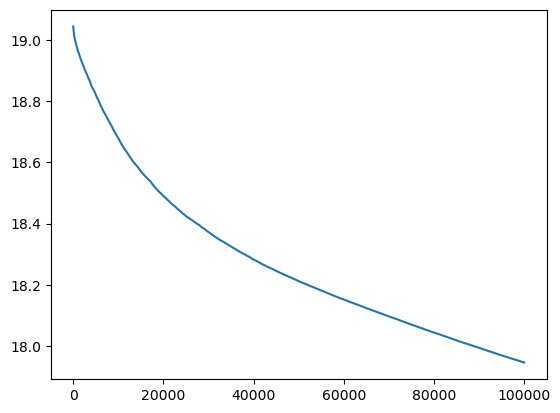

In [21]:
X = np.c_[np.ones((15,1)),x_train].T

import numpy as np

#initialize weights
w = np.zeros((2,1))
conv = []
wpath = []
wpath.append(w)
n_iters = 100000
Jopt = 9e16
wopt = w
mbatch_size=10
step = 0.0001
epsilon = 1e-16
D = w
m = w
g1 = 0.9
g2 = 0.999
for k in range(1, n_iters):
    # get a noisy gradient by just taking one data point at random and get the instantaneous gradient
    i = np.random.randint(0, X.shape[1], size=mbatch_size)
    x_sample = X[:, i]
    y_sample = y_train[i, :]
    g_tilde = -2 * np.dot(x_sample, (y_sample - np.dot(x_sample.T, w)))

    # Adam optimization
    m = g1 * m + (1 - g1) * g_tilde
    D = g2 * D + (1 - g2) * np.diag(g_tilde**2)

    # Ensure D is a square matrix
    D = np.diag(D)

    # Create D_reg as a 2x2 matrix and add a small constant to the diagonal
    D_reg = np.zeros((2, 2))
    np.fill_diagonal(D_reg, D + epsilon)
    
    alpha_k = step * (1 - g2**k)**0.5 / (1 - g1**k)
    w -= alpha_k * (np.linalg.inv(D_reg) @ m)

    # Clip the values of w if needed to ensure it stays within a certain range.
    # For example, to keep w within [-1, 1]:
    # w = np.clip(w, -1, 1)

    # Keep the best weight up to that point
    J = np.sum((np.dot(X.T, w) - y_train) * (np.dot(X.T, w) - y_train))
    if J < Jopt:
        wopt = w
        Jopt = J
    conv.append(Jopt)
    wpath.append(w)

# Plot the convergence curve
plt.plot(conv)

<div class = "alert alert-success" style = "border-radius:10px">**EXERCISE** Plot the convergence curves for all methods at the same time.</div>